<a href="https://colab.research.google.com/github/thiphawan-j/final-project-honest-doctor/blob/master/Final_Project_HonestDoctor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/My Drive/Project_HonesDoctor2020

[Errno 2] No such file or directory: '/content/drive/My Drive/Project_HonesDoctor2020'
/content


In [3]:
!pip install googletrans
!pip install tqdm #--upgrade
!pip install twython

In [0]:
import requests
from bs4 import BeautifulSoup
from time import  time, sleep
from random import randint

from googletrans import Translator

from tqdm import tqdm
from tqdm import tqdm_notebook
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from nltk import sent_tokenize, word_tokenize
from nltk.sentiment.vader import  SentimentIntensityAnalyzer
from nltk.sentiment.util import mark_negation

In [5]:
import nltk

nltk.download("punkt")
nltk.download("vader_lexicon")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [0]:
def honestdoc_comment(url):
  """
    INPUT
      url : String
        URL of the target website
    OUTPUT
      comment : List
        List of comments
      score : List
        List of rating score
  """
  data = requests.get(url)
  print("requests code : {}".format(data.status_code))
  print("note\n2xx : successs\n4xx, 5xx : error")

  start_time = time()
  r = requests.get(url, params=dict(query="web scraping", page=1))
  soup = BeautifulSoup(r.text, "html.parser")
  n = len(soup.find_all("div", {"class": "comments__content"}))

  comment = [ soup.find_all("div", {"class": "comments__content"})[i].get_text().strip() for i in range(0, n) ]
  score = [ soup.find_all("span", {"class": "stars star-rating"})[i].attrs["data-score"] for i in range(0, n) ]

  elapsed_time = time() - start_time
  print("Time used for scraping data from page 1 : {} s".format(elapsed_time))
  sleep(randint(1,3))

  p = 2
  while n > 0:
    start_time = time()
    r = requests.get(url, params=dict(query="web scraping", page=p))
    soup = BeautifulSoup(r.text, "html.parser")
    n = len(soup.find_all("div", {"class": "comments__content"}))
    [ comment.append(soup.find_all("div", {"class": "comments__content"})[i].get_text().strip()) for i in range(0,n) ]
    [ score.append(soup.find_all("span", {"class": "stars star-rating"})[i].attrs["data-score"]) for i in range(0,n) ]
    elapsed_time = time() - start_time
    print("Time used for scraping data from page {} : {} s".format(p, elapsed_time))
    p += 1
    sleep(randint(1,3))
  #backup
  pd.DataFrame({"comment": comment, "score": score}).to_csv("comment_"+str(url[url.rfind("/")+1:]) + ".csv", index=False)
  return comment, score


In [0]:
# We choose the following lists of hospitals to make sentiment analysis.
# โรงพยาบาลศิริราช ปิยมหาราชการุณย์
# https://www.honestdocs.co/hospitals/siriraj-piyamaharajkarun-hospital
# โรงพยาบาลสิรินธร
# https://www.honestdocs.co/hospitals/sirindhorn-hospital
# โรงพยาบาลตำรวจ
# https://www.honestdocs.co/hospitals/police-general-hospital

In [11]:
#โรงพยาบาลศิริราช ปิยมหาราชการุณย์
siripiya_comments, siripiya_scores = honestdoc_comment(r"https://www.honestdocs.co/hospitals/siriraj-piyamaharajkarun-hospital")

requests code : 200
note
2xx : successs
4xx, 5xx : error
Time used for scraping data from page 1 : 1.0504777431488037 s
Time used for scraping data from page 2 : 1.13710355758667 s
Time used for scraping data from page 3 : 1.0514352321624756 s
Time used for scraping data from page 4 : 1.204641342163086 s
Time used for scraping data from page 5 : 1.0832407474517822 s
Time used for scraping data from page 6 : 1.0867314338684082 s
Time used for scraping data from page 7 : 1.1434197425842285 s
Time used for scraping data from page 8 : 1.2026290893554688 s
Time used for scraping data from page 9 : 1.1111013889312744 s
Time used for scraping data from page 10 : 1.075077772140503 s
Time used for scraping data from page 11 : 1.0804367065429688 s
Time used for scraping data from page 12 : 1.100059986114502 s
Time used for scraping data from page 13 : 1.1375226974487305 s
Time used for scraping data from page 14 : 1.0734786987304688 s
Time used for scraping data from page 15 : 1.086282730102539 

In [12]:
siripiya_comments

['วันนี้ไปเยี่ยมเพื่อนมาคะพึ่งคลอดลูก เป็นห้องรวมแต่พยาบาลดูแลดีมาก หมอทำคลอดดีมากต้องขอชื่นชมค่ะ แถมสถานที่สะอาดมากๆมีที่ให้ญาติๆได้เข้าเยี่ยมได้อย่างสะดวกสะบาย ถึงแม้จะเป็นห้องรวมก็ตาม แต่รู้สึกโอเคกับการบริการในครั้งนี้มาก หวังว่าเพื่อนของฉันจะได้รับการบริการที่ดีแบบนี้จนกว่าจะได้กลับมาผักผ่อนที่บ้านนะคะ',
 'ผมเคยปัสสาวะบ่อยมากๆ วันนึง 20รอบ \r\n แล้วได้เข้ารับการรักษาที่โรงพยาบาลแห่งนี้  ผมประทับใจในการบริการของคุณหมอและเจ้าหน้าที่มากๆ รับฟังคนไข้ดีมาก  ดูแลดี ยิ้มแย้ม   ขั้นตอนต่างๆดูเป็นมืออาชีพมากๆมีระดับ รวดเร็วมากๆครับ  ประทับใจมากครับ  รู้สึกไม่ผิดหวังที่เข้ารับการรักษาที่โรงพยาบาลแห่งนี้\r\n\r\nและชอบการdesign ตึก/ภายในตึกหรือ ห้องต่างๆในโรงพยาบาลนี้มากครับ ดูสวยงามสะอาดตา  ทันสมัยมากๆ',
 'ดีมากเลยค่ะะ เคยไม่สบายเป็นไข้คุณหมอพูดจาน่ารัก พยาบาลดีมากเลยค่ะ เป็นโรงพยาบาลที่ดีในระแวกใกล้บ้านที่หนึ่งเลยค่ะ ค่ารักษาเหมาะสมกับการเข้ารับการรักษา และผู้จ่ายยามีการอธิบายการรับประทานยาชัดเจน มีความติดตามคนไข้อยู่ตลอด คุณหมอคอยตามอาการคนไข้อย่างใกล้ชิด และมีอัธยาศัยดี ยิ้มแย้ม มีการให้ค

In [0]:
#โรงพยาบาลสิรินธร
sirin_comments, sirin_scores = honestdoc_comment(r"https://www.honestdocs.co/hospitals/sirindhorn-hospital")

requests code : 200
note
2xx : successs
4xx, 5xx : error
Time used for scraping data from page 1 : 1.1964259147644043 s
Time used for scraping data from page 2 : 1.3463499546051025 s
Time used for scraping data from page 3 : 1.0993828773498535 s
Time used for scraping data from page 4 : 1.0611436367034912 s
Time used for scraping data from page 5 : 1.1909384727478027 s
Time used for scraping data from page 6 : 1.0724310874938965 s
Time used for scraping data from page 7 : 1.1243042945861816 s
Time used for scraping data from page 8 : 1.160315752029419 s
Time used for scraping data from page 9 : 1.2152361869812012 s
Time used for scraping data from page 10 : 1.0636365413665771 s
Time used for scraping data from page 11 : 1.080599069595337 s
Time used for scraping data from page 12 : 1.1033086776733398 s
Time used for scraping data from page 13 : 1.138059377670288 s
Time used for scraping data from page 14 : 1.0880699157714844 s
Time used for scraping data from page 15 : 1.06230878829956

In [0]:
sirin_comments

In [0]:
#โรงพยาบาลตำรวจ
police_comments, police_scores = honestdoc_comment(r"https://www.honestdocs.co/hospitals/police-general-hospital")

In [0]:
police_comments

Import Data

In [0]:
siripiya = pd.read_csv("comment_siriraj-piyamaharajkarun-hospital.csv")
print(siripiya.shape)
siripiya.head()

In [0]:
sirin = pd.read_csv("comment_sirindhorn-hospital.csv")
print(sirin.shape)
sirin.head()

In [0]:
police = pd.read_csv("comment_police-general-hospital.csv")
print(police.shape)
police.head()

In [0]:
'''
gt = Translator()
input_text = "หิวข้าวรึยัง"
gt.translate(input_text, src="th", dest="en").text
'''

Comment Translation

In [0]:
def th2en(comment):
  print(comment + "\n")
  return Translator().translate(comment, src="th", dest="en").text

Check data for โรงพยาบาลศิริราช ปิยะฯ

In [0]:
#for check lenght 2000 with issue comment

i = 0
for x in siripiya['comment']:
 if len(siripiya['comment'][i]) > 2000:
  print(len(siripiya['comment'][i]), "-> index : ", i)
 i=i+1

In [0]:
#check emoji
import re
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [0]:
'''
siripiya["en"] = siripiya.progress_apply(lambda x: th2en(x["comment"]), axis=1)
There is an unexpected issue at comment 395th  - index 394 - Found Emoji
395/396 [05:52<00:00,  1.11it/s]เคยไปหาแพทย์ผิวหนัง คุณหมอต่อพงษ์ (จำนามสกุลไม่ได้อะค่ะ) การบริการดีเยี่ยม👍🏻 คุณหมอให้คำปรึกษาดี ติดตามอาการ แต่ควรนัดล่วงหน้านะค่ะ จะได้ไม่ต้องรอนาน^^ ข้อดีของที่นี่ สถานที่⭐️⭐️⭐️⭐️⭐️ ที่จอดรถมีเยอะค่ะ ถ้ามาหาคุณหมอจอดฟรี ถ้าไม่ได้มาหาคุณหมอชม.100฿😅นะจ๊ะ ข้อเสีย รถติดมากจ้า🚗🚕🚙 ค่ารักษาที่นี่พอๆกับรพ.เอกชน (เพราะรายได้ส่วนหนึ่งนำไปช่วยเหลือผู้ป่วยขาดแคลนจ้า)
so try to remove emoji and run above again
'''
print(siripiya.iloc[394,:].values[0])
siripiya.iloc[394,0] = remove_emojis(siripiya.iloc[394,0])
siripiya.iloc[394,:].values[0]

In [0]:
tqdm.pandas()

siripiya["en"] = siripiya.progress_apply(lambda x: th2en(x["comment"]), axis=1)

In [0]:
siripiya.head(10)

In [0]:
rename_col = ['comment','en','score']
siripiya = siripiya.reindex(columns=rename_col)
siripiya.columns = ['th_comment','en_comment','score']
siripiya.head()

In [0]:
#export to csv incluing th-comment, en-comment, score
siripiya.to_csv('en-comment_siriraj-piya-hospital.csv', index=False ,encoding='utf-8')

Check data for โรงพยาบาสิรินธร

In [0]:
#for check lenght with issue comment
i = 0
for x in sirin['comment']:
 if len(sirin['comment'][i]) > 1000:
  print(len(sirin['comment'][i]), "-> index : ", i)
 i=i+1

In [0]:
print(sirin.shape)
sirin.drop(14, inplace=True)
print(sirin.shape)
sirin.head()

In [0]:
tqdm.pandas()

sirin["en"] = sirin.progress_apply(lambda x: th2en(x["comment"]), axis=1)

In [0]:
sirin.head(10)

Check data for โรงพยาบาลตำรวจ

In [0]:
police = pd.read_csv("comment_police-general-hospital.csv")
print(police.shape)
police.head()

In [0]:
#for check lenght with issue comment
i = 0
for x in police['comment']:
 if len(police['comment'][i]) > 1000:
  print(len(police['comment'][i]), "-> index : ", i)
 i=i+1

In [0]:
tqdm.pandas()

police["en"] = police.progress_apply(lambda x: th2en(x["comment"]), axis=1)

In [0]:
police.head(10)

In [0]:
rename_col = ['comment','en','score']
police = police.reindex(columns=rename_col)
police.columns = ['th_comment','en_comment','score']
police.head()

Export from dataframe to CSV

In [0]:
#rename
rename_col = ['comment','en','score']

In [0]:
siripiya = siripiya.reindex(columns=rename_col)
siripiya.columns = ['th_comment','en_comment','score']
siripiya.head()

In [0]:
sirin = sirin.reindex(columns=rename_col)
sirin.columns = ['th_comment','en_comment','score']
sirin.head()

In [0]:
police = police.reindex(columns=rename_col)
police.columns = ['th_comment','en_comment','score']
police.head()

In [0]:
#export to csv incluing th-comment, en-comment, score
siripiya.to_csv('en-comment_siriraj-piya-hospital.csv', index=False ,encoding='utf-8')

In [0]:
#export to csv incluing th-comment, en-comment, score
sirin.to_csv('en-comment_sirindhorn-hospital.csv', index=False ,encoding='utf-8')

In [0]:
#export to csv incluing th-comment, en-comment, score
police.to_csv('en-comment_police-general-hospital.csv', index=False ,encoding='utf-8')

Import data

In [0]:
en_siripiya = pd.read_csv("en-comment_siriraj-piya-hospital.csv")
print(en_siripiya.shape)
en_siripiya.head()

In [0]:
en_sirin = pd.read_csv("en-comment_sirindhorn-hospital.csv")
print(en_sirin.shape)
en_sirin.head()

In [0]:
en_police = pd.read_csv("en-comment_sirindhorn-hospital.csv")
print(en_police.shape)
en_police.head()

Sentence-level Extraction

In [0]:
def sent_level_polarity(df, target):
  sentences = []
  scores = []
  for i in df.index:
    en = df.loc[i, target]
    score = df.loc[i, "score"]
    s = sent_tokenize(en)
    sentences = sentences + s
    scores = scores + [score]*len(s)
  return pd.DataFrame({"sentences": sentences, "scores": scores})

In [0]:
def predict_sentiment(sentence):
  sa = SentimentIntensityAnalyzer()
  sentiment_distribution = sa.polarity_scores(sentence)
  score = sentiment_distribution.get("compound")
  
  if score >= 0.05:
    return "positive"
  elif score <= -0.05:
    return "negative"
  else:
    return "neutral"

In [0]:
import nltk
nltk.download('punkt')

In [0]:
data_siripya = sent_level_polarity(df=en_siripiya, target="en_comment")
data_siripya["sentiment_polarity"] = data_siripya["sentences"].apply(lambda x: predict_sentiment(x))
data_siripya.head()

In [0]:
data_sirin = sent_level_polarity(df=en_sirin, target="en_comment")
data_sirin["sentiment_polarity"] = data_sirin["sentences"].apply(lambda x: predict_sentiment(x))
data_sirin.head()

In [0]:
data_police = sent_level_polarity(df=en_police, target="en_comment")
data_police["sentiment_polarity"] = data_police["sentences"].apply(lambda x: predict_sentiment(x))
data_police.head()

Exclude Neutral - Neutral comments will be excluded.

In [0]:
data_siripya = data_siripya[data_siripya["sentiment_polarity"] != "neutral"].reset_index(drop=True)
data_siripya

In [0]:
data_sirin = data_sirin[data_sirin["sentiment_polarity"] != "neutral"].reset_index(drop=True)
data_sirin

In [0]:
data_police = data_police[data_police["sentiment_polarity"] != "neutral"].reset_index(drop=True)
data_police

Marking Negation - Negation twists sentiment polarity. Let's mark them and twist sentiment polarity.

In [0]:
def neg_extract(text):
  tokens = word_tokenize(text)
  return " ".join([token[0:-4] if token[-4:] == "_NEG" else token for token in tokens])

In [0]:
#Siriraj Piya
data_siripya["neg_mark"] = data_siripya["sentences"].apply(lambda x: " ".join(mark_negation(x.split())))
data_siripya["flag"] = data_siripya["neg_mark"].apply(lambda x: True if "_NEG" in x else False)
data_siripya["neg_words"] = data_siripya["neg_mark"].apply(lambda x: neg_extract(x))
data_siripya["post_polarity"] = data_siripya["neg_words"].apply(lambda x: predict_sentiment(x))
data_siripya.head(10)

In [0]:
#Sirindhorn
data_sirin["neg_mark"] = data_sirin["sentences"].apply(lambda x: " ".join(mark_negation(x.split())))
data_sirin["flag"] = data_sirin["neg_mark"].apply(lambda x: True if "_NEG" in x else False)
data_sirin["neg_words"] = data_sirin["neg_mark"].apply(lambda x: neg_extract(x))
data_sirin["post_polarity"] = data_sirin["neg_words"].apply(lambda x: predict_sentiment(x))
data_sirin.head(10)

In [0]:
#Sirindhorn
data_police["neg_mark"] = data_police["sentences"].apply(lambda x: " ".join(mark_negation(x.split())))
data_police["flag"] = data_police["neg_mark"].apply(lambda x: True if "_NEG" in x else False)
data_police["neg_words"] = data_police["neg_mark"].apply(lambda x: neg_extract(x))
data_police["post_polarity"] = data_police["neg_words"].apply(lambda x: predict_sentiment(x))
data_police.head(10)

**#Part 2** TEXT Processing


In [0]:
df_siripya = pd.read_csv("en-comment_siriraj-piya-hospital.csv")
df_sirin = pd.read_csv("en-comment_sirindhorn-hospital.csv")
df_police = pd.read_csv("en-comment_police-general-hospital.csv")

In [138]:
df_siripya.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   th_comment  396 non-null    object
 1   en_comment  396 non-null    object
 2   score       396 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 9.4+ KB


In [139]:
df_sirin.info()
df_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   th_comment  282 non-null    object
 1   en_comment  282 non-null    object
 2   score       282 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 6.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   th_comment  262 non-null    object
 1   en_comment  262 non-null    object
 2   score       262 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 6.3+ KB


In [140]:
df_siripya.head(5)


,th_comment,en_comment,score
0,วันนี้ไปเยี่ยมเพื่อนมาคะพึ่งคลอดลูก เป็นห้องรว...,Today I visited my friend's baby. But as well ...,5
1,ผมเคยปัสสาวะบ่อยมากๆ วันนึง 20รอบ \r\n แล้วได้...,I urinate very often around day 20.\r\n He was...,4
2,ดีมากเลยค่ะะ เคยไม่สบายเป็นไข้คุณหมอพูดจาน่ารั...,"Good Ceaa had discomfort, fever, doctor's parl...",5
3,แม่ผมเข้ารับการรักษาอาการเส้นเลือดสมองตีบและเป...,I've been treating cerebral thrombosis and pat...,1
4,ดีมากเลยค่ะะ เคยไม่สบายเป็นไข้คุณหมอพูดจาน่ารั...,"Good Ceaa had discomfort, fever, doctor's parl...",5


#============**NEW text preprocessing**=================================

In [141]:
#Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
#Text Processing
import nltk
from nltk.corpus import stopwords
import re

nltk.download("stopwords")
nltk.download("punkt")

def text_preprocess(data_hospi):
  sw = stopwords.words("english")
  data_hospi=data_hospi.apply(lambda x:re.sub(r'[^a-zA-Z]',' ', str(x)))
  data_hospi=data_hospi.apply(lambda x:sum([word_tokenize(sentence) for sentence in sent_tokenize(x.lower())],[]))
  data_hospi=data_hospi.apply(lambda x:list(set(x)-set(sw)))
  data_hospi=data_hospi.apply(lambda x:" ".join(x))
  return data_hospi
# df_siripya["tokens"]=df_siripya["tokens"].apply(lambda x: [item for item in x if item not in sw])
df_siripya["tokens"] = text_preprocess(df_siripya["en_comment"])
df_sirin["tokens"] = text_preprocess(df_sirin["en_comment"])
df_police["tokens"] = text_preprocess(df_police["en_comment"])

# df_siripya

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#================================================================================================

In [0]:
#Import Utilities
from tqdm import tqdm_notebook

#read data
import pandas as pd

def reset_index_fun(hospital):
  hospital = hospital.reset_index()
  hospital = hospital.rename(columns={"index": "cid"})
  return(hospital)




data_siripya = reset_index_fun(df_siripya)
data_sirin = reset_index_fun(df_sirin)
data_police = reset_index_fun(df_police)


In [143]:
##check data

# data_police.head()
#data_sirin.head()

data_siripya.head()

,cid,th_comment,en_comment,score,tokens
0,0,วันนี้ไปเยี่ยมเพื่อนมาคะพึ่งคลอดลูก เป็นห้องรว...,Today I visited my friend's baby. But as well ...,5,appreciate rest visited baby good better clean...
1,1,ผมเคยปัสสาวะบ่อยมากๆ วันนึง 20รอบ \r\n แล้วได้...,I urinate very often around day 20.\r\n He was...,4,around smiling good rooms clean level feel get...
2,2,ดีมากเลยค่ะะ เคยไม่สบายเป็นไข้คุณหมอพูดจาน่ารั...,"Good Ceaa had discomfort, fever, doctor's parl...",5,nearest smiling patient parlance hygiene treat...
3,3,แม่ผมเข้ารับการรักษาอาการเส้นเลือดสมองตีบและเป...,I've been treating cerebral thrombosis and pat...,1,mother work found aspect c hospital zone yes c...
4,4,ดีมากเลยค่ะะ เคยไม่สบายเป็นไข้คุณหมอพูดจาน่ารั...,"Good Ceaa had discomfort, fever, doctor's parl...",5,nearest smiling patient parlance hygiene treat...


# `Sentence Tokenize`

In [144]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
from nltk import sent_tokenize


def sent_tokenize_func(data_hos):
  sentences = []
  cids = []
  for cid in data_hos["cid"]:
      s = sent_tokenize(data_hos.loc[cid, "tokens"])
      sentences = sentences + s
      cids = cids + [cid] * len(s)
  return sentences,cids

#Sentence-level sentiment



In [147]:
import nltk
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [146]:
!pip install twython

In [0]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [0]:
def predict_sentiment(sentence):
  sa = SentimentIntensityAnalyzer()
  sentiment_distribution = sa.polarity_scores(sentence)
  score = sentiment_distribution.get("compound")
  
  if score >= 0.05:
    return "positive"
  elif score <= -0.05:
    return "negative"
  else:
    return "neutral"

In [0]:
 def sentiments_func(sentences):
  sentiments = []
  for sentence in tqdm_notebook(sentences, total=len(sentences)):
      sentiments.append(predict_sentiment(sentence))
  return sentiments


#sentences,cids = sent_tokenize_func(data_siripya)
# sentences,cids = sent_tokenize_func(data_sirin)
# sentences,cids = sent_tokenize_func(data_police)

In [151]:
#sentiments
#1.siripya
sentences1,cids1 = sent_tokenize_func(data_siripya)
sentiments1 = sentiments_func(sentences1)

#2.sirin
sentences2,cids2 = sent_tokenize_func(data_sirin)
sentiments2 = sentiments_func(sentences2)

#3.police
sentences3,cids3 = sent_tokenize_func(data_police)
sentiments3 = sentiments_func(sentences3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


In [152]:
###sent_tokenize_func ประโยคภาษาอังกฤษ
sentences1


['appreciate rest visited baby good better clean room feel get included okay delivered convenient like care much doctors friends well relatives nursing place service hope visit friend today great home although',
 'around smiling good rooms clean level feel get patients staff often beautiful urinate modern treated hospital like care doctors building professional disappointed admitted fast day design services impressed step',
 'nearest smiling patient parlance hygiene treatment good patients closely aspects cleanliness clearly one hospital medications explained follow add followed ceaa doctor symptoms dispense wagga nursing discomfort service keeping fever courteous knowledge various proper',
 'mother work found aspect c hospital zone yes care survive right going hands opens well hostels chulalongkorn nursing mention service departure resulting ambulatory lose wipe receive outcry wound bed coming provinces next thumb return money bottom week better treating feel siriraj expect may three 

In [153]:
###sentiments_func : ประโยคเป็นpositive,neutral,negative
sentiments1

['positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'neutral',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'neutral',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'neutral',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'neutral',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'neutral',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'posi

#Parsing


In [154]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [0]:
from nltk import word_tokenize, pos_tag, RegexpParser

In [0]:
def parsing_func(sentences):
  grammar = """NP: {<NN|NNS>+}
                  {<NN|NNS>+<CC><NN|NNS>+}"""
  chunker = RegexpParser(grammar)
  parse_trees = []
  for sentence in sentences:
      parse_trees.append(chunker.parse(pos_tag(word_tokenize(sentence))))
  return parse_trees
#sentences,cids = sent_tokenize_func(data_siripya)
# sentences,cids = sent_tokenize_func(data_sirin)
# sentences,cids = sent_tokenize_func(data_police)

In [0]:
parse_trees_siripya = parsing_func(sentences1)
parse_trees_sirin = parsing_func(sentences2)
parse_trees_police = parsing_func(sentences3)

In [158]:
#parsing_func: check ไวยากรณ์
parse_trees_siripya

[Tree('S', [Tree('NP', [('appreciate', 'NN'), ('rest', 'NN')]), ('visited', 'VBN'), ('baby', 'RB'), ('good', 'JJ'), ('better', 'RBR'), ('clean', 'JJ'), Tree('NP', [('room', 'NN'), ('feel', 'NN'), ('get', 'NN')]), ('included', 'VBD'), ('okay', 'RB'), ('delivered', 'VBN'), Tree('NP', [('convenient', 'NN')]), ('like', 'IN'), Tree('NP', [('care', 'NN')]), ('much', 'JJ'), Tree('NP', [('doctors', 'NNS')]), ('friends', 'VBZ'), ('well', 'RB'), Tree('NP', [('relatives', 'NNS')]), ('nursing', 'VBG'), Tree('NP', [('place', 'NN'), ('service', 'NN')]), ('hope', 'VBP'), Tree('NP', [('visit', 'NN'), ('friend', 'NN'), ('today', 'NN')]), ('great', 'JJ'), Tree('NP', [('home', 'NN')]), ('although', 'IN')]),
 Tree('S', [('around', 'IN'), ('smiling', 'VBG'), ('good', 'JJ'), Tree('NP', [('rooms', 'NNS')]), ('clean', 'VBP'), Tree('NP', [('level', 'NN'), ('feel', 'NN')]), ('get', 'VBP'), Tree('NP', [('patients', 'NNS'), ('staff', 'NN')]), ('often', 'RB'), ('beautiful', 'JJ'), ('urinate', 'JJ'), Tree('NP', [('

#Extract Noun Phrase

In [0]:
def extract_np(parsed_tree):
    nps = []
    for subtree in parsed_tree.subtrees():
        if subtree.label() == 'NP':
            t = subtree
            t = " ".join(word for word, tag in t.leaves())
            nps.append(t)
    return nps


In [0]:
def parse_func(parse_trees):
  nps = []
  for parse_tree in parse_trees:
      nps.append(extract_np(parse_tree))
  return nps

In [0]:
# parse_trees_siripya = parsing_func(sentences1)
# parse_trees_sirin = parsing_func(sentences2)
# parse_trees_police = parsing_func(sentences3)

nps_siripya = parse_func(parse_trees_siripya)
nps_sirin = parse_func(parse_trees_sirin)
nps_police = parse_func(parse_trees_police)

In [162]:
#parse_func : noun หรือ pronoun เป็นคำหลัก
nps_siripya

[['appreciate rest',
  'room feel get',
  'convenient',
  'care',
  'doctors',
  'relatives',
  'place service',
  'visit friend today',
  'home'],
 ['rooms',
  'level feel',
  'patients staff',
  'modern',
  'hospital',
  'care doctors',
  'day design services',
  'step'],
 ['parlance hygiene treatment',
  'patients',
  'hospital medications',
  'add',
  'doctor symptoms',
  'nursing discomfort service',
  'knowledge',
  'proper'],
 ['mother work',
  'hospital zone',
  'care',
  'hands',
  'hostels',
  'mention service departure',
  'wipe receive outcry',
  'bed',
  'provinces',
  'return money bottom week',
  'feel siriraj',
  'assoc doctor',
  'wait',
  'report fever services skin',
  'home worse',
  'thrombosis',
  'lesions',
  'heart',
  'sore health treat',
  'study',
  'wounds symptoms',
  'day',
  'brain',
  'pressure',
  'months',
  'patients weeks',
  'think',
  'mouth people',
  'nurses',
  'recuperating',
  'centers',
  'afternoon'],
 ['parlance hygiene treatment',
  'patie

#Put information into DataFrame



In [0]:
df_siripya = pd.DataFrame({"cids": cids1, 
                   "sentences": sentences1, 
                   "sentiments": sentiments1, 
                   "NP": nps_siripya})

df_sirin = pd.DataFrame({"cids": cids2, 
                   "sentences": sentences2, 
                   "sentiments": sentiments2, 
                   "NP": nps_sirin})

df_police = pd.DataFrame({"cids": cids3, 
                   "sentences": sentences3, 
                   "sentiments": sentiments3, 
                   "NP": nps_police})

In [164]:
df_siripya

,cids,sentences,sentiments,NP
0,0,appreciate rest visited baby good better clean...,positive,"[appreciate rest, room feel get, convenient, c..."
1,1,around smiling good rooms clean level feel get...,positive,"[rooms, level feel, patients staff, modern, ho..."
2,2,nearest smiling patient parlance hygiene treat...,positive,"[parlance hygiene treatment, patients, hospita..."
3,3,mother work found aspect c hospital zone yes c...,negative,"[mother work, hospital zone, care, hands, host..."
4,4,nearest smiling patient parlance hygiene treat...,positive,"[parlance hygiene treatment, patients, hospita..."
...,...,...,...,...
388,391,understand easy may nurses doctors take siddiq...,positive,"[easy, doctors, siddique, step]"
389,392,voice restaurant good clean medical wide staff...,positive,"[voice restaurant, staff health, point problem..."
390,393,parking facilities,neutral,[parking facilities]
391,394,choruses appointment treatment good organizati...,positive,"[choruses, treatment, organizations patients r..."


In [165]:
df_police.head(10)

,cids,sentences,sentiments,NP
0,0,promenade moving serving good conveniently dep...,positive,"[promenade, department, flattering doctors, ch..."
1,1,debris choice appreciate impact patient major ...,positive,"[debris choice, impact, take, rooms, hospitals..."
2,2,currently hrs patient lunch round call third u...,negative,"[lunch round call, uncle stunk]"
3,3,wants system check around management asked pat...,positive,"[system, management, particular, department or..."
4,4,took sleeping care room nurse son,positive,[care room nurse son]
5,5,listening check life patient money treatment g...,positive,"[life, money treatment, emergency, drug diseas..."
6,6,mother child take week emergency departments e...,positive,"[mother child, week emergency departments, dru..."
7,7,anc nurses hospital wait say minute police rarely,neutral,"[anc nurses, wait, police]"
8,8,poor doctor accept hospital still parlance per...,positive,"[doctor, hospital, personnel, public, hospital..."
9,9,maintained process great speech police birth,positive,"[process, speech police birth]"


#Split dataframe into positive and negative sentiment


In [0]:

def split_pos(df):
  pos = df[df["sentiments"] == "positive"].reset_index(drop=True)
  pos_words = sum(pos["NP"].tolist(), [])
  pos_words = [word.lower() for word in pos_words]
  poshist = pd.DataFrame({"words": pos_words})
  poshist = poshist.groupby("words").size().reset_index(name="#pos")
  return poshist

def split_neg(df):
  neg = df[df["sentiments"] == "negative"].reset_index(drop=True)
  neg_words = sum(neg["NP"].tolist(), [])
  neg_words = [word.lower() for word in neg_words]
  neghist = pd.DataFrame({"words": neg_words})
  neghist = neghist.groupby("words").size().reset_index(name="#neg")
  return neghist

In [0]:
#df_siripya
poshist_sip = split_pos(df_siripya)
neghist_sip = split_neg(df_siripya)
# df_sirin
poshist_sir = split_pos(df_sirin)
neghist_sir = split_neg(df_sirin)
# df_police
poshist_pol = split_pos(df_police)
neghist_pol = split_neg(df_police)

In [168]:
neghist_sip

,words,#neg
0,address use,1
1,adhd,1
2,advantages lot,1
3,afternoon,1
4,anything,2
...,...,...
225,words,1
226,workers,1
227,wounds symptoms,1
228,year treat,1


In [169]:
df_siripya
df_sirin
df_police

,cids,sentences,sentiments,NP
0,0,promenade moving serving good conveniently dep...,positive,"[promenade, department, flattering doctors, ch..."
1,1,debris choice appreciate impact patient major ...,positive,"[debris choice, impact, take, rooms, hospitals..."
2,2,currently hrs patient lunch round call third u...,negative,"[lunch round call, uncle stunk]"
3,3,wants system check around management asked pat...,positive,"[system, management, particular, department or..."
4,4,took sleeping care room nurse son,positive,[care room nurse son]
...,...,...,...,...
256,257,doctor nurse generous beaming,positive,"[doctor, beaming]"
257,258,cut mind mab front emergency department counte...,negative,"[cut mind mab, emergency department counter sp..."
258,259,quick good maintaining clear service explanation,positive,[service explanation]
259,260,medics long well quick hospital wait time brea...,positive,"[medics, hospital wait time, division]"


In [0]:
df_siripya = df_siripya[df_siripya["sentiments"] != "neutral"].reset_index(drop=True)
df_sirin = df_sirin[df_sirin["sentiments"] != "neutral"].reset_index(drop=True)
df_police = df_police[df_police["sentiments"] != "neutral"].reset_index(drop=True)

In [0]:
df_siripya1 = df_siripya[df_siripya["sentiments"] != "neutral"].reset_index(drop=True)
df_sirin1 = df_sirin[df_sirin["sentiments"] != "neutral"].reset_index(drop=True)
df_police1 = df_police[df_police["sentiments"] != "neutral"].reset_index(drop=True)

In [0]:
df_siripya.sentiments.replace(('positive', 'negative','neutral'), (1, 0, 2), inplace=True)
df_sirin.sentiments.replace(('positive', 'negative','neutral'), (1, 0, 2), inplace=True)
df_police.sentiments.replace(('positive', 'negative','neutral'), (1, 0, 2), inplace=True)

In [173]:
df_siripya.info()
df_sirin.info()
df_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   cids        329 non-null    int64 
 1   sentences   329 non-null    object
 2   sentiments  329 non-null    int64 
 3   NP          329 non-null    object
dtypes: int64(2), object(2)
memory usage: 10.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   cids        233 non-null    int64 
 1   sentences   233 non-null    object
 2   sentiments  233 non-null    int64 
 3   NP          233 non-null    object
dtypes: int64(2), object(2)
memory usage: 7.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   cids        221 non-nu

In [0]:
#Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

#Modeling

In [0]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold,RepeatedStratifiedKFold
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.metrics import hamming_loss
from sklearn import svm

In [0]:
def classifier_model(df):
  from sklearn.pipeline import Pipeline
  X = df["sentences"].tolist()
  tfidf_vectorizer = TfidfVectorizer()

  y = np.array(df["sentiments"].tolist())
  X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)

  lda = LatentDirichletAllocation(n_components=100)
  #samples = lda.fit_transform(X)
  kfold = StratifiedKFold( n_splits = 10, random_state = 2000 )

  #model 1
  svm_clf=svm.SVC()
  svm_params = {'classifier__C': range(10, 50, 20),'classifier__kernel': ['linear','rbf']}
  svm_pipeline = Pipeline([('tfidf', tfidf_vectorizer), ('classifier', svm_clf)])

  grid_m1 = GridSearchCV(svm_pipeline, param_grid=svm_params, cv=kfold, n_jobs=-1, scoring='accuracy')

  grid_m1.fit(X_train, y_train) 
  ypred_m1 = grid_m1.predict(X_test)


  #model 2
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.pipeline import Pipeline

  rand_clf =  RandomForestClassifier(random_state=2000)
  rand_pipeline = Pipeline([('tfidf', tfidf_vectorizer), ('classifier', rand_clf)])
  rand_params = {
      "classifier__n_estimators": range(50, 100, 200),
      "classifier__max_depth": range(2, 5, 2), 
      "classifier__min_samples_leaf": range(1, 9),
      "classifier__max_features": ['auto', 'sqrt', 'log2']
    }

  grid_m2 = GridSearchCV(rand_pipeline, param_grid=rand_params, cv=kfold, scoring='accuracy')
  grid_m2.fit(X_train, y_train) 
  ypred_m2 = grid_m2.predict(X_test)


  #model 3
  knn_params = {'knn__n_neighbors': range(10, 100, 30),
                'knn__weights':['uniform', 'distance'],
                'knn__algorithm':['auto', 'ball_tree','kd_tree','brute'],
                }
  knn_clf = KNeighborsClassifier()

  knn_pipeline = Pipeline([('tfidf', tfidf_vectorizer),
                            ('knn', knn_clf)
                            ])
  grid_m3 = GridSearchCV(knn_pipeline, param_grid=knn_params, cv=kfold, scoring='accuracy')
  grid_m3.fit(X_train, y_train) 
  ypred_m3 = grid_m3.predict(X_test)

  print("===========================================")
  print("Best params SVM :",grid_m1.best_params_)
  print("Score :",grid_m1.score(X_test, y_test))
  print("===========================================")
  print('Hamming loss:{0}'.format(hamming_loss(y_test,ypred_m1)))
  print("Accuracy:", accuracy_score(y_test, ypred_m1))
  print("Precision:", precision_score(y_test, ypred_m1))
  print(classification_report(y_test, ypred_m1))
  print(confusion_matrix(y_test, ypred_m1))
  print("===========================================")

  print("Best params Random forest:",grid_m2.best_params_)
  print("Score :",grid_m2.score(X_test, y_test))
  print("===========================================")
  print('Hamming loss:{0}'.format(hamming_loss(y_test,ypred_m2)))
  print("Accuracy:", accuracy_score(y_test, ypred_m2))
  print("Precision:", precision_score(y_test, ypred_m2))
  print(classification_report(y_test, ypred_m2))
  print(confusion_matrix(y_test, ypred_m2))
  print("===========================================")

  print("Best params KNN:",grid_m3.best_params_)
  print("Score :",grid_m3.score(X_test, y_test))
  print("===========================================")
  print('Hamming loss:{0}'.format(hamming_loss(y_test,ypred_m3)))
  print("Accuracy:", accuracy_score(y_test, ypred_m3))
  print("Precision:", precision_score(y_test, ypred_m3))
  print(classification_report(y_test, ypred_m3))
  print(confusion_matrix(y_test, ypred_m3))
  print("===========================================")


In [177]:
classifier_model(df_siripya)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/_base.py:414: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/_base.py:414: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/_base.py:414: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/_base.py:414: UserWarning: cannot use tree with sparse input: using brute force
  warnings.w

Best params SVM : {'classifier__C': 10, 'classifier__kernel': 'linear'}
Score : 0.9090909090909091
Hamming loss:0.09090909090909091
Accuracy: 0.9090909090909091
Precision: 0.9193548387096774
              precision    recall  f1-score   support

           0       0.75      0.38      0.50         8
           1       0.92      0.98      0.95        58

    accuracy                           0.91        66
   macro avg       0.83      0.68      0.72        66
weighted avg       0.90      0.91      0.90        66

[[ 3  5]
 [ 1 57]]
Best params Random forest: {'classifier__max_depth': 2, 'classifier__max_features': 'auto', 'classifier__min_samples_leaf': 1, 'classifier__n_estimators': 50}
Score : 0.8787878787878788
Hamming loss:0.12121212121212122
Accuracy: 0.8787878787878788
Precision: 0.8787878787878788
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.88      1.00      0.94        58

    accuracy         

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [178]:
classifier_model(df_sirin)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/_base.py:414: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/_base.py:414: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/_base.py:414: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/_base.py:414: UserWarning: cannot use tree with sparse input: using brute force
  warnings.w

Best params SVM : {'classifier__C': 10, 'classifier__kernel': 'linear'}
Score : 0.8723404255319149
Hamming loss:0.1276595744680851
Accuracy: 0.8723404255319149
Precision: 0.8709677419354839
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        18
           1       0.87      0.93      0.90        29

    accuracy                           0.87        47
   macro avg       0.87      0.85      0.86        47
weighted avg       0.87      0.87      0.87        47

[[14  4]
 [ 2 27]]
Best params Random forest: {'classifier__max_depth': 4, 'classifier__max_features': 'auto', 'classifier__min_samples_leaf': 2, 'classifier__n_estimators': 50}
Score : 0.6595744680851063
Hamming loss:0.3404255319148936
Accuracy: 0.6595744680851063
Precision: 0.6444444444444445
              precision    recall  f1-score   support

           0       1.00      0.11      0.20        18
           1       0.64      1.00      0.78        29

    accuracy           

In [179]:
classifier_model(df_police)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/_base.py:414: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/_base.py:414: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/_base.py:414: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/_base.py:414: UserWarning: cannot use tree with sparse input: using brute force
  warnings.w

Best params SVM : {'classifier__C': 10, 'classifier__kernel': 'linear'}
Score : 0.8666666666666667
Hamming loss:0.13333333333333333
Accuracy: 0.8666666666666667
Precision: 0.8717948717948718
              precision    recall  f1-score   support

           0       0.83      0.50      0.62        10
           1       0.87      0.97      0.92        35

    accuracy                           0.87        45
   macro avg       0.85      0.74      0.77        45
weighted avg       0.86      0.87      0.85        45

[[ 5  5]
 [ 1 34]]
Best params Random forest: {'classifier__max_depth': 4, 'classifier__max_features': 'auto', 'classifier__min_samples_leaf': 2, 'classifier__n_estimators': 50}
Score : 0.7777777777777778
Hamming loss:0.2222222222222222
Accuracy: 0.7777777777777778
Precision: 0.7777777777777778
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.78      1.00      0.88        35

    accuracy          

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Visualization

**Word Cloud Representation**

In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [0]:
def vizwordcloud(df):
    tuples = [tuple(x) for x in df.values]
    wordcloud = WordCloud().generate_from_frequencies(dict(tuples))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

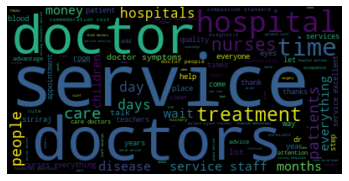

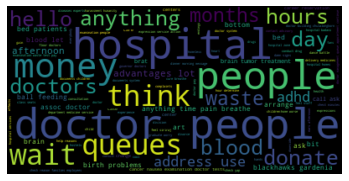

In [182]:
vizwordcloud(poshist_sip)
vizwordcloud(neghist_sip)

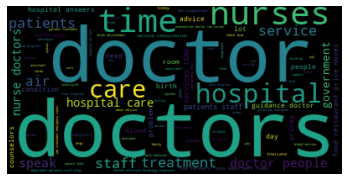

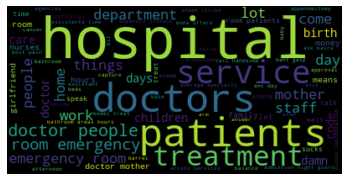

In [183]:
vizwordcloud(poshist_sir)
vizwordcloud(neghist_sir)

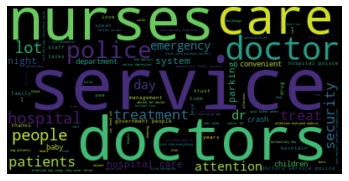

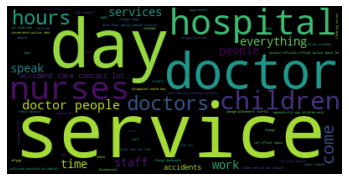

In [184]:
vizwordcloud(poshist_pol)
vizwordcloud(neghist_pol)

In [0]:
def plural2singular(word):
  if word == "doctors":
    return "doctor"
  elif word == "nurses":
    return "nurse"
  elif word == "services":
    return "service"
  elif word == "hospitals":
    return "hospital"
  elif word == "clinics":
    return "clinic"
  elif word == "staffs":
    return "staff"
  elif word == "treatments":
    return "treatment"
  elif word == "students":
    return "student"
  else:
    return word

In [0]:
def plura_pos(df):
  pos = df[df["sentiments"] == "positive"].reset_index(drop=True)
  pos_words = sum(pos["NP"].tolist(), [])
  pos_words = [plural2singular(word) for word in pos_words]
  poshist = pd.DataFrame({"words": pos_words})
  poshist = poshist.groupby("words").size().reset_index(name="#pos")
  return poshist

def plura_neg(df):
  neg = df[df["sentiments"] == "negative"].reset_index(drop=True)
  neg_words = sum(neg["NP"].tolist(), [])
  neg_words = [plural2singular(word) for word in neg_words]
  neghist = pd.DataFrame({"words": neg_words})
  neghist = neghist.groupby("words").size().reset_index(name="#neg")
  return neghist

In [0]:
#siripya
posplura_sip = plura_pos(df_siripya1)
negplura_sip = plura_neg(df_siripya1)
#sirin
posplura_sir = plura_pos(df_sirin1)
negplura_sir = plura_neg(df_sirin1)
#police
posplura_pol = plura_pos(df_police1)
negplura_pol = plura_neg(df_police1)

In [191]:
posplura_sip

,words,#pos
0,access,1
1,access service excellent,1
2,accommodation pongtep,1
3,ack decor,1
4,acne blemishes,1
...,...,...
708,year,3
709,year bare,1
710,year treatment,1
711,years,3


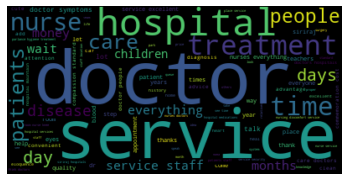

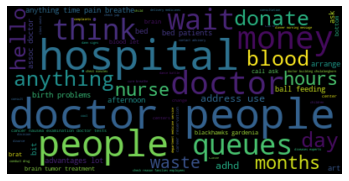

In [192]:
vizwordcloud(posplura_sip)
vizwordcloud(negplura_sip)

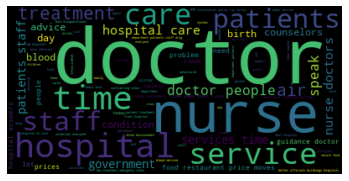

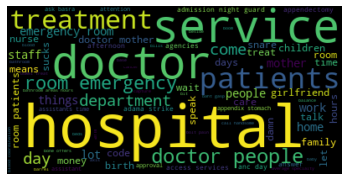

In [193]:
vizwordcloud(posplura_sir)
vizwordcloud(negplura_sir)

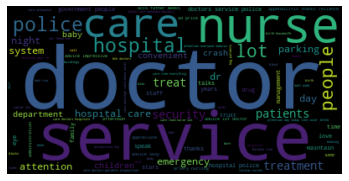

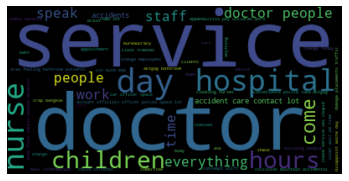

In [194]:
vizwordcloud(posplura_pol)
vizwordcloud(negplura_pol)

In [0]:
def groups(word):
    if word in ("doctor", "nurse", "student"):
        return "staff"
    elif word in ("hospital", "clinic", "equipment", "place"):
        return "infrastructure"
    elif word in ("service", "care", "treatment", "surgery", "disease", "medical care"):
        return "service"
    elif word in ("queue", "appointment"):
        return "process"
    elif word in ("price", "claim"):
        return "finance"
    else:
        return "others"

In [0]:
def groups_pos(df):
  df["category"] = df["words"].apply(lambda x: groups(x))
  cat_count = df.groupby("category").size().reset_index(name="#")
  cat_count = cat_count[cat_count["category"] != "others"].reset_index(drop=True)
  return cat_count

In [0]:
#siripya
poscount_sip = groups_pos(posplura_sip)
negcount_sip = groups_pos(negplura_sip)
#sirin
poscount_sir = groups_pos(posplura_sir)
negcount_sir = groups_pos(negplura_sir)
#police
poscount_pol = groups_pos(posplura_pol)
negcount_pol = groups_pos(negplura_pol)


In [198]:
poscount_sip

,category,#
0,finance,1
1,infrastructure,3
2,process,2
3,service,5
4,staff,2


In [199]:
negcount_sip

,category,#
0,finance,1
1,infrastructure,2
2,process,1
3,service,4
4,staff,2


In [200]:
poscount_sir

,category,#
0,infrastructure,1
1,process,1
2,service,4
3,staff,2


In [201]:
negcount_sir

,category,#
0,finance,1
1,infrastructure,1
2,service,3
3,staff,2


In [202]:
poscount_pol

,category,#
0,infrastructure,2
1,service,4
2,staff,2


In [203]:
negcount_pol

,category,#
0,infrastructure,1
1,process,1
2,service,1
3,staff,2


**Plot Radar Chart**

In [0]:
import plotly.express as px
def polar_plot(df):
  fig = px.line_polar(df, r="#", theta="category", line_close=True)
  fig.show()

In [205]:
#siripya
polar_plot(poscount_sip)
polar_plot(negcount_sip)

In [206]:
#sirin
polar_plot(poscount_sir)
polar_plot(negcount_sir)

In [207]:
#police
polar_plot(poscount_pol)
polar_plot(negcount_pol)